# Exercise 3 - A preview of peer-review

A review panel has to rank 100 scientific proposals in experimental physics. The ranking criteria are based on the one hand on 1) foundational merit of the work & feasibility, and on the other hand on 2) societal impact & public interest. Let’s assume that these criteria are independent of each other. The review panel weighs these two criteria equally in formulating a final grade. 10% of the best graded proposals are recommended for funding. Simulate this experiment using R. Draw random Gaussian criteria for each proposal and compute the final grade being the sum of the two criteria. What is the consequence of this procedure on the funded proposals? Can you suggest a better approach?

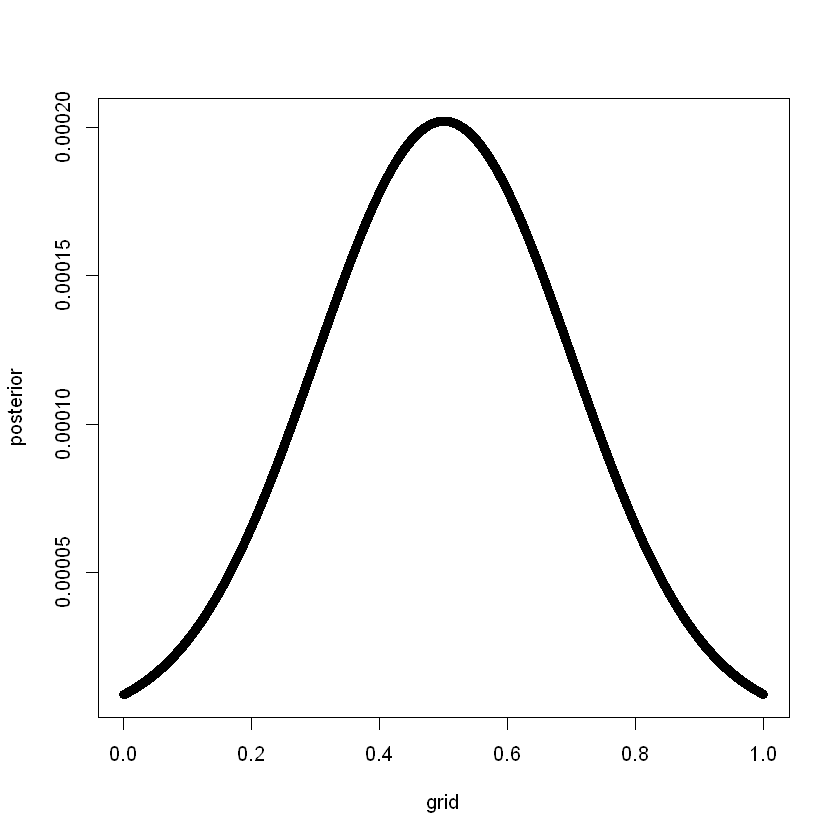

In [29]:
# First we define a grid
gridpoints <- 10001
grid <- seq(from = 0, to = 1, length.out = 10001)

# The prior probability is uniform
prior <- rep(1, gridpoints)

# The likelihood is gaussian
likelihood <- dnorm(grid, mean = 0.5, sd = 0.2)

# Bayes theorem
pre_posterior <- likelihood * prior
posterior <- pre_posterior / sum(pre_posterior)

plot(grid, posterior)

Now that we have a normal distribution, we take 100 samples two times for the two criteria. We then plot the sampels in the phase space of all possible criteria combinations.

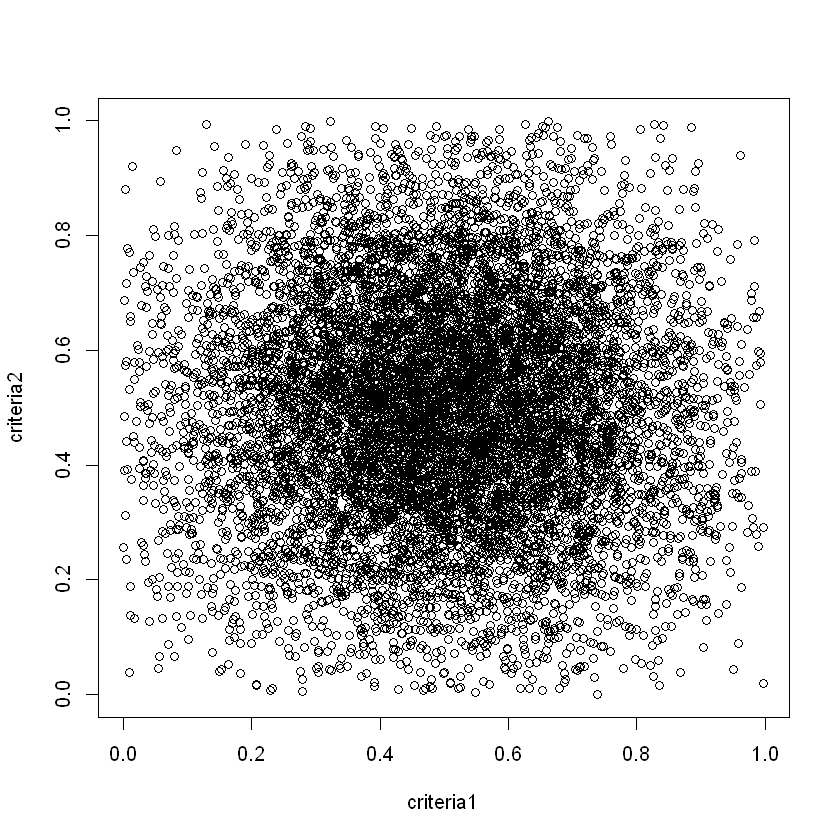

In [30]:
samples_amount <- 10000
criteria1 <- sample(grid, prob = posterior, size = samples_amount, replace = TRUE)
criteria2 <- sample(grid, prob = posterior, size = samples_amount, replace = TRUE)

# Criteria space plot
plot(criteria1, criteria2)

We are interested int he 10 best proposals.

In [31]:
acceptance <- 1000

We want the best proposals to proceed, meaning the ones which are closest to the top right corner. We thus identify the proposals with the biggest sum of both criteria.

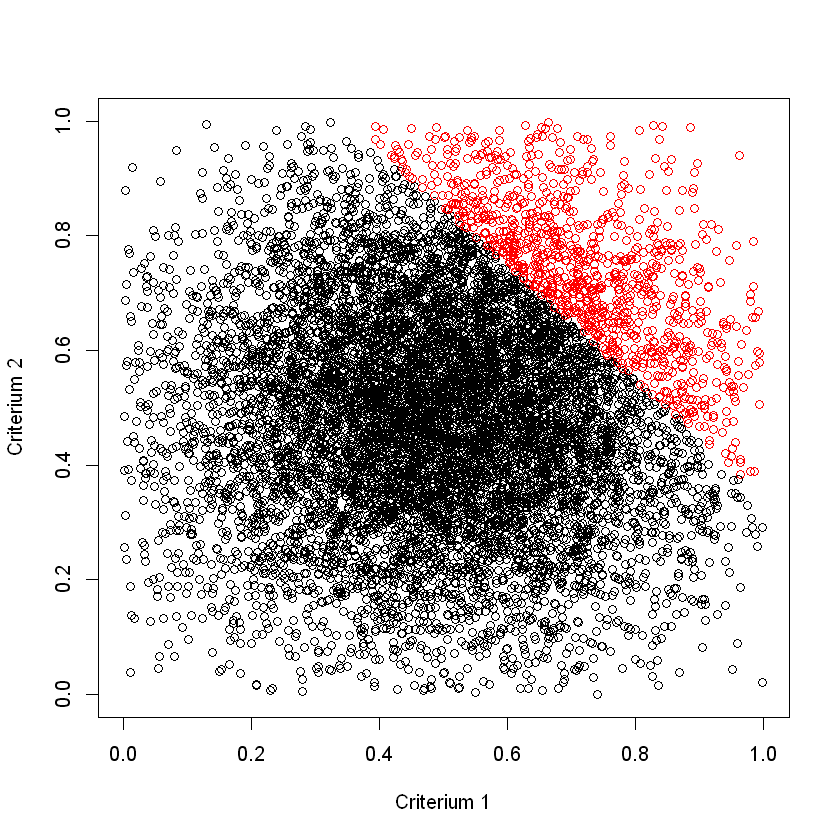

In [32]:
criteria_sum <- criteria1 + criteria2

props <- data.frame(criteria1, criteria2, criteria_sum)

# Sort the dataframe by the sum of the two criteria
props <- props[order(-criteria_sum), ]

crit1 <- c()
crit2 <- c()
crit_sum <- c()

for (index in 1:acceptance) {
	crit1 <- append(crit1, props$criteria1[index])
	crit2 <- append(crit2, props$criteria2[index])
	crit_sum <- append(crit_sum, props$criteria_sum[index])
}

max_sum_props <- data.frame(crit1, crit2, crit_sum)

plot(props$criteria1, props$criteria2, xlim = c(0, 1), ylim = c(0, 1), col = "black", xlab = "Criterium 1", ylab = "Criterium 2")
par(new = TRUE)
plot(max_sum_props$crit1, max_sum_props$crit2, xlim = c(0, 1), ylim = c(0, 1), col = "red", xlab = "", ylab = "")

Yet the sum does not equal those that are closest to the top right corner. A next choice to measure would be the distance to the $(1.0, 1.0)$ coordinate. Thus for each proposal $(c_1, c_2)$ we calculate the distance

$$d = \sqrt{(1.0 - c_1)^2 + (1.0 - c_2)^2}.$$

We then take those proposals which have the smallest distance.

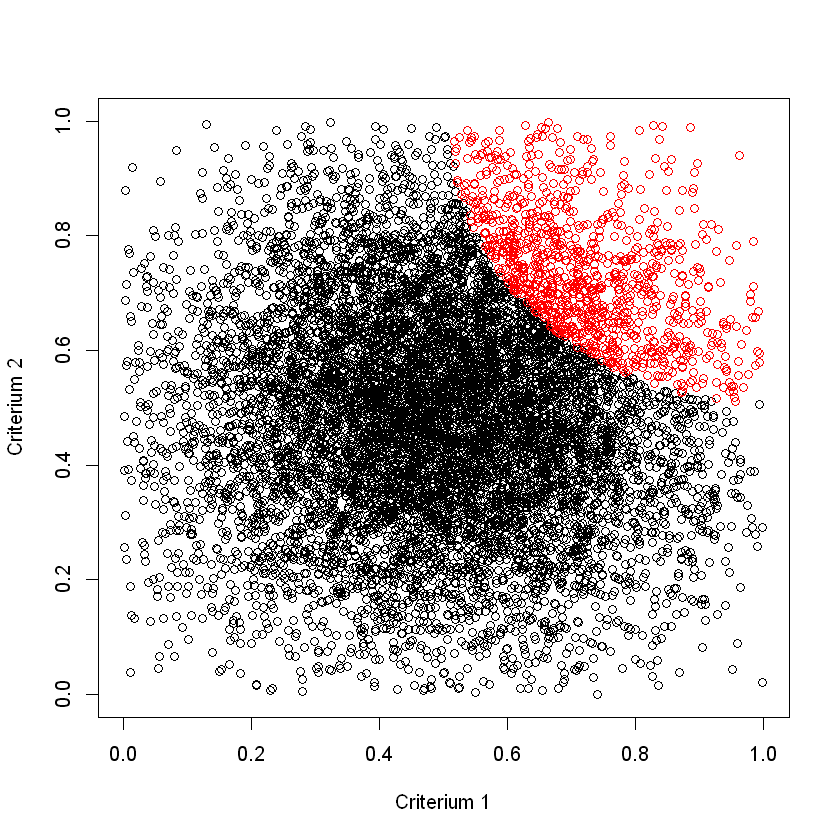

In [33]:
distance <- sqrt((1.0 - criteria1)^2 + (1.0 - criteria2)^2)

props <- data.frame(criteria1, criteria2, distance)

# Sort the dataframe by the sum of the two criteria
props <- props[order(distance), ]

crit1 <- c()
crit2 <- c()
distance <- c()

for (index in 1:acceptance) {
	crit1 <- append(crit1, props$criteria1[index])
	crit2 <- append(crit2, props$criteria2[index])
	distance <- append(distance, props$distance[index])
}

min_dist_props <- data.frame(crit1, crit2, distance)

plot(props$criteria1, props$criteria2, xlim = c(0, 1), ylim = c(0, 1), col = "black", xlab = "Criterium 1", ylab = "Criterium 2")
par(new = TRUE)
plot(min_dist_props$crit1, min_dist_props$crit2, xlim = c(0, 1), ylim = c(0, 1), col = "red", xlab = "", ylab = "")

This proposed new approach would in my oppinion be better, as it represents distance in a two dimensional space more naturally.